# <center>ENEM - pt. 2
<hr>

## <center>Inicialização
<hr>

In [1]:
%%time

from tcc_funcoes import *

=================================== Módulo importado com sucesso ===================================

CPU times: user 1.3 s, sys: 61.3 ms, total: 1.36 s
Wall time: 591 ms


In [2]:
%%time

v_arquivos_pickle = [
    ('dc_preditoras.pkl', 'dc_preditoras'),
    ('dc_target.pkl', 'dc_target'),
    ('edicoes.pkl', 'edicoes'),
    ('dc_dfs_sem_outliers.pkl', 'dc_dfs'),
    ('dc_nome_salvar.pkl', 'dc_nome_salvar')
]

abre_arquivos_pickle(v_arquivos_pickle, globals())

del v_arquivos_pickle
gc.collect()

CPU times: user 32.4 ms, sys: 366 ms, total: 398 ms
Wall time: 399 ms


0

## <center>Análise Exploratória - Preditoras
<hr>

Vamos primeiro analisar a variável que representa o ano de conclusão do ensino médio: $\texttt{ano\_conclusao\_ensino\_medio}$.

Como estamos usando dados de 4 edições do ENEM (2020 a 2023), o código '0' representa 

In [29]:
dc_dfs['Redação'].groupby(['ano_conclusao_ensino_medio']).agg({'index':'count'}) / len(dc_dfs['Redação'])

,index
ano_conclusao_ensino_medio,
0,0.576965
1,0.124611
2,0.069512
3,0.045495
4,0.032963
5,0.024439
6,0.018619
7,0.014472
8,0.011692


In [20]:
variavel = 'ano_conclusao_ensino_medio'

for nome, df in dc_dfs.items():

    print(f' {nome} '.center(60, '='))

    print(df.groupby(['edicao', variavel]).size().unstack())

===================== Ciências Humanas =====================
ano_conclusao_ensino_medio         0         1         2         3        4   \
edicao                                                                         
2020                        1062993.0  269845.0  161174.0  112789.0  77777.0   
2021                        1060273.0  227124.0  130983.0   82958.0  58799.0   
2022                        1165068.0  242100.0  107938.0   81812.0  54644.0   
2023                        1295504.0  231668.0  139447.0   74964.0  64068.0   

ano_conclusao_ensino_medio       5        6        7        8        9   \
edicao                                                                    
2020                        60164.0  46801.0  37292.0  31041.0  24668.0   
2021                        41771.0  31959.0  25069.0  19791.0  16879.0   
2022                        40885.0  28768.0  22694.0  17773.0  14303.0   
2023                        46458.0  36701.0  27152.0  22080.0  17946.0   

ano_con

In [21]:
dc_preditoras['Ciências Humanas']

['fx_etaria',
 'sexo',
 'estado_civil',
 'cor_raca',
 'nacionalidade',
 'conclusao_ensino_medio',
 'ano_conclusao_ensino_medio',
 'flag_treineiro',
 'lingua_estrangeira',
 '01_escolaridade_pai',
 '02_escolaridade_mae',
 '03_ocupacao_pai',
 '04_ocupacao_mae',
 '05_qtde_moradores',
 '06_renda_familiar',
 '07_qtde_trabalhador_domestico',
 '08_qtde_banheiro',
 '09_qtde_quarto',
 '10_qtde_carro',
 '11_qtde_motocicleta',
 '12_qtde_geladeira',
 '13_qtde_freezer',
 '14_qtde_maq_lavar_roupa',
 '15_qtde_maq_secar_roupa',
 '16_qtde_micro_ondas',
 '17_qtde_maq_lavar_louca',
 '18_flag_aspirador_po',
 '19_qtde_tv',
 '20_flag_aparelho_dvd',
 '21_flag_tv_assinatura',
 '22_qtde_celular',
 '23_flag_telefone_fixo',
 '24_qtde_computadores',
 '25_flag_internet']

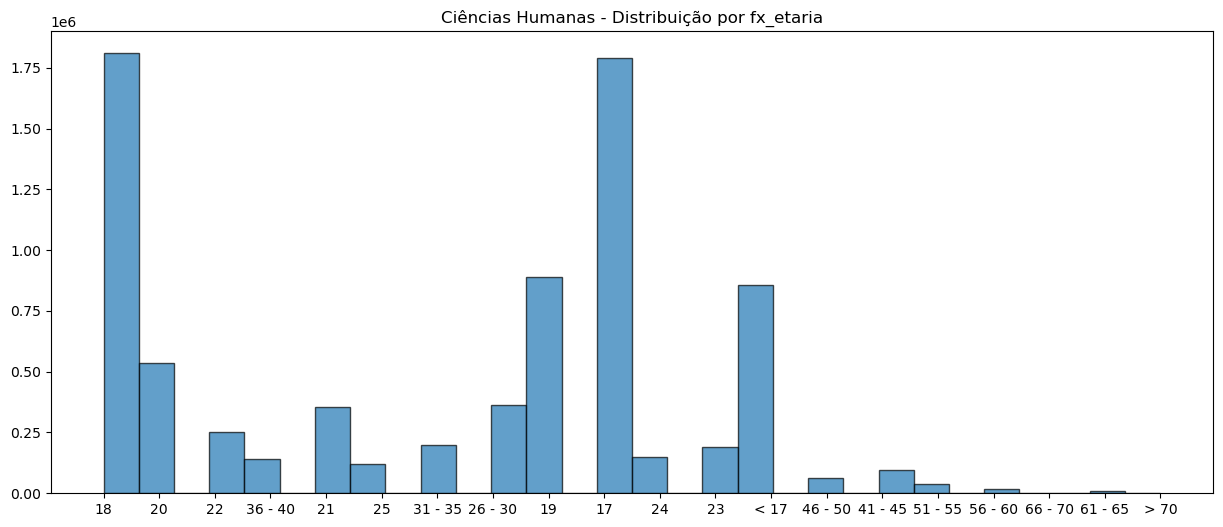

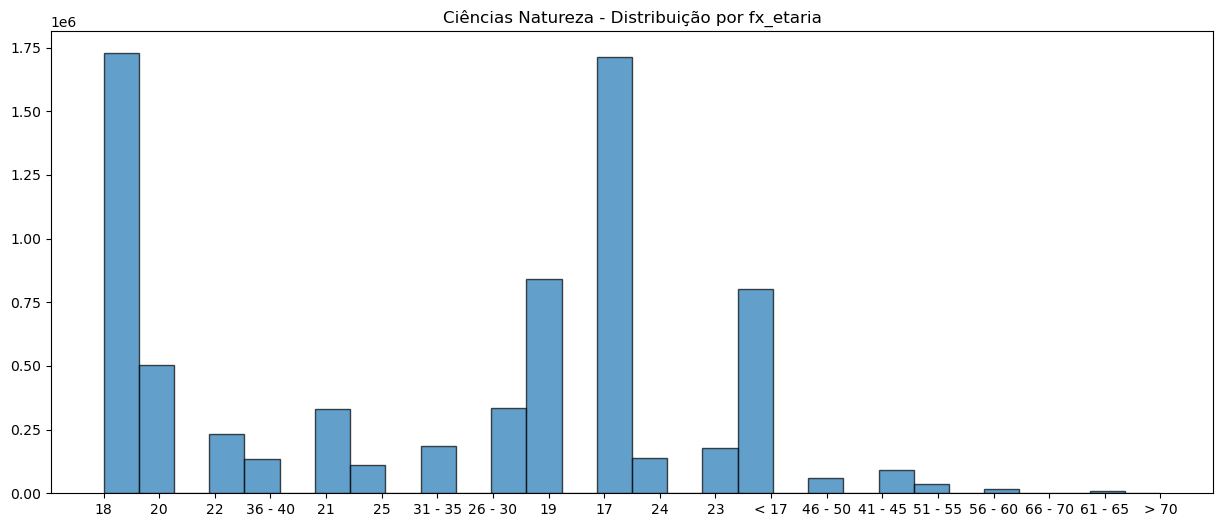

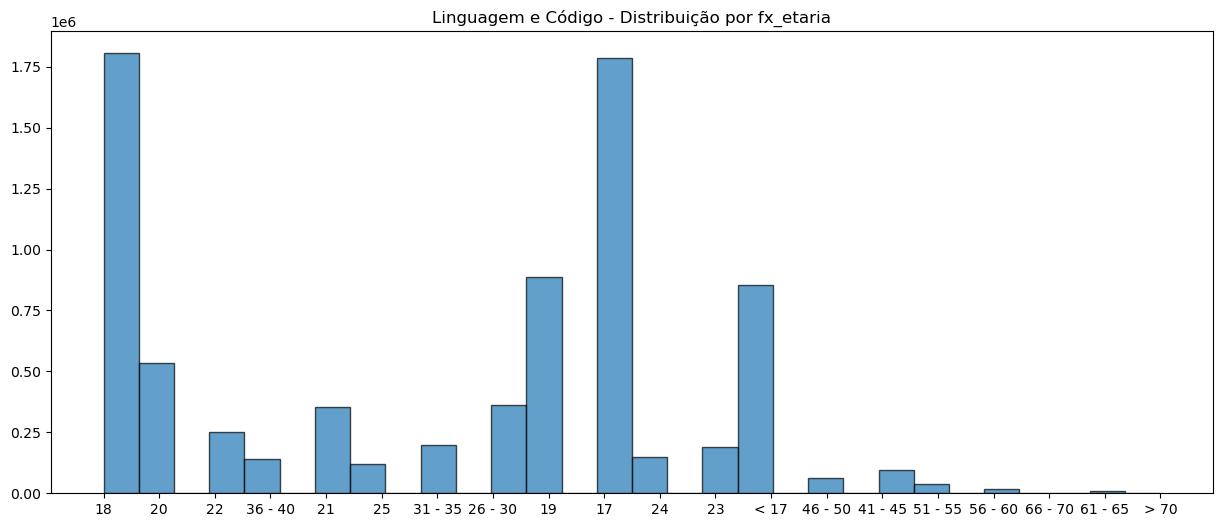

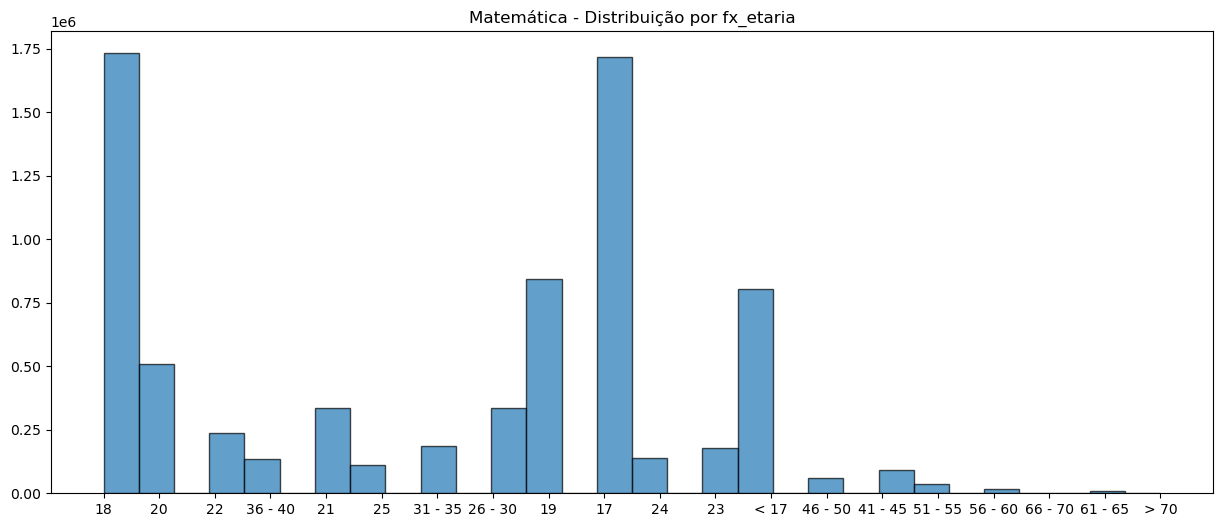

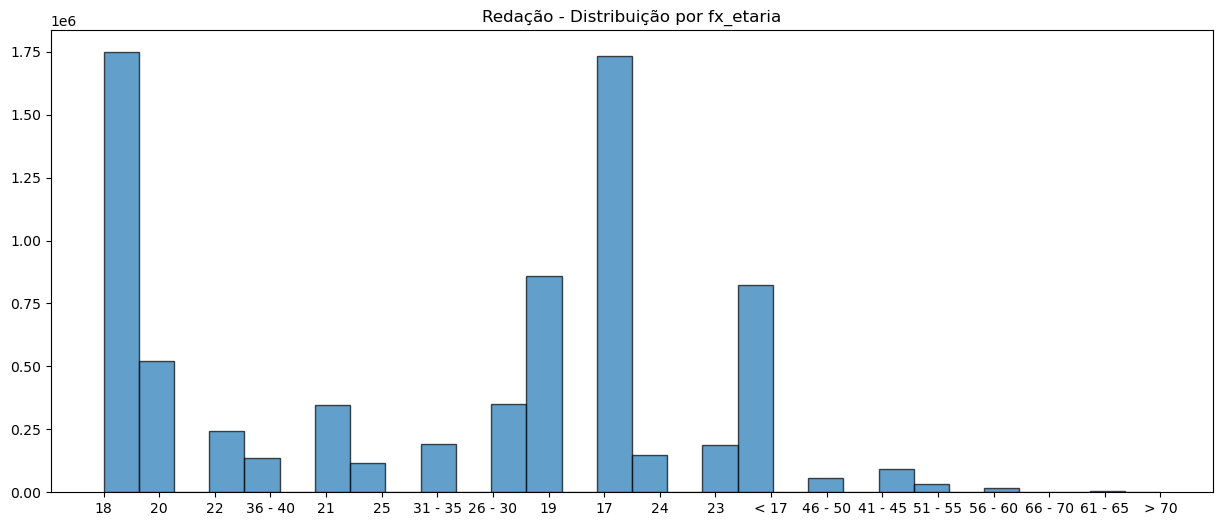

In [22]:
variavel = 'fx_etaria'

for k in dc_dfs.keys():

    df = dc_dfs[k]

    plt.figure(figsize = (15, 6))

    plt.hist(
        df[variavel],
        bins = 30,
        edgecolor = 'black',
        alpha = 0.7,
    )
    plt.xticks(sorted(df[variavel].unique()))
    plt.title(f"{k} - Distribuição por {variavel}")
    plt.show()

In [23]:
# from phik import report

# for nome, df in dc_dfs.items():

#     print("=" * 50)
#     print()

#     print(f"Análise de correlação - {nome}")
#     print()

#     phik_overview = report.correlation_report(df[dc_preditoras[nome] + [dc_target[nome]]], bins = 10)

#     print(phik_overview)

#     print()